In [1]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from collections import Counter

In [2]:
corpuspath = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\unclean_text_data_test\\'
corpus = PlaintextCorpusReader(corpuspath, '.*' , )

In [3]:
import re
def normalize_corpus(corpus_passed):
    counter = 0
    document_keys = {}
    normalized_corpus = []    
    for fileid in corpus_passed.fileids():
        text = corpus_passed.raw(fileid)
        tokenize_text = corpus_passed.words(fileid)
        filtered_tokens = []
        filtered_text = ' '.join(filtered_tokens)
        # Saving Key for document
        
        #text_pattern = r'[a-zA-Z]'
        #cleantext2 = re.sub(r'[a-zA-Z]', '', text)
        
        #print(cleantext2)
        normalized_corpus.append(filtered_text)
        document_keys[counter] =  fileid
        counter = counter + 1
        #print('__________________________________________')
    return normalized_corpus , document_keys

In [ ]:
Sparsity

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from gensim.test.utils import common_texts, get_tmpfile
#from gensim.models import Word2Vec
# We improve our feature matrix builder with 3 additional optional parameters
# This allows us to extract not only word features, but also n-gram features
# We can also set the minimum and maximum frequencies to be considered as valid
# NB: All these are simply passed on to sklearn's Vectorizer classes
def build_feature_matrix(documents, feature_type='frequency', ngram_range=(1, 1), min_df=0.01, max_df=0.85):
    # max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    # max_df = 25 means "ignore terms that appear in more than 25 documents".
    # default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". 
    # Thus, the default setting does not ignore any terms.
    
    # min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    # min_df = 5 means "ignore terms that appear in less than 5 documents".
    # default min_df is 1, which means "ignore terms that appear in less than 1 document". 
    # Thus, the default setting does not ignore any terms.
    
    # We are setting max df to 85%

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer( ngram_range=ngram_range)
    elif feature_type =='word2vec' :
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                 ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

In [47]:
# build_feature_matrix(['I have a dream', 'go to hell'])

In [50]:
normalized_corpus, row_id_keys = normalize_corpus(corpus)

# Extract (tf-idf) features using out utils library
tfidf_vectorizer, tfidf_feature_matrix = build_feature_matrix(normalized_corpus,
                                                  feature_type='tfidf',
                                                  #min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))

In [30]:
new_doc = ['loving FUck this blue sky today']

In [32]:
v.get_feature_names()

['blue', 'fuck', 'loving', 'sky', 'this', 'today']

In [6]:
binary_vectorizer, binary_feature_matrix = build_feature_matrix(normalized_corpus,
                                                  feature_type='binary',
                                                  #min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))

In [33]:
train_feature_matrix = tfidf_feature_matrix[:40]
test_feature_matrix = tfidf_feature_matrix[40:]


In [34]:
from sklearn.cluster import KMeans

# Define the k-means clustering function which will call sklearn's KMeans function
# with our parameters
def k_means(feature_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [35]:
corpus.fileids()[5]

'3B9wLEPpb4.11331682998371562.txt'

In [36]:
#!!!!!!!!!!!!!!!!!!!!!!!!! IMPORTNT
# corpus.fileids()[5]
# # '5ZXOjh7b8b.051154254863466364.txt'
# txt = corpus.raw('5ZXOjh7b8b.051154254863466364.txt')
# vectorized=tfidf_vectorizer.fit_transform(corpus.words('5ZXOjh7b8b.051154254863466364.txt'))
# num_samples, num_features=vectorized.shape 

In [120]:
print(tfidf_feature_matrix.shape)     

# Get the names of the features
feature_names = tfidf_vectorizer.get_feature_names()

# Show the first twenty features (check more if needed)
print(feature_names[:50])

(61, 4188)
['0d9lb41kwa', '10m', '10th', '11bq3eiy6i', '11th', '12th', '13th', '14th', '150th', '15th', '16th', '17th', '18th', '1970s', '1h', '1m', '1st', '20m', '21st', '26th', '2h', '2nd', '2sinrgotuf', '3ice', '3m', '3rd', '3s', '55m', '57m', '5m', '60s', '70s', '75m', '76ers', '7t0p0r8pyr', '83e6vwhwop', '8m', '8u7cea6fm1', '90s', '9gem', '9m', 'aa', 'abc', 'abe', 'abide', 'aboard', 'about', 'above', 'absence', 'absorbed']


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
from sklearn.cluster import KMeans

# Define the k-means clustering function which will call sklearn's KMeans function
# with our parameters
def k_means(feature_matrix, num_clusters=5):
    km = KMeans(n_clusters=num_clusters,
                max_iter=10000)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

In [39]:
distortions = []
K = range(1,10)
# Running K-Means with a range of k
for k in K: 
    km_obj, clusters = k_means(feature_matrix=train_feature_matrix,
                           num_clusters=k)
    # inertia_ is the distance from each sample to the centroid.
    distortions.append(km_obj.inertia_)

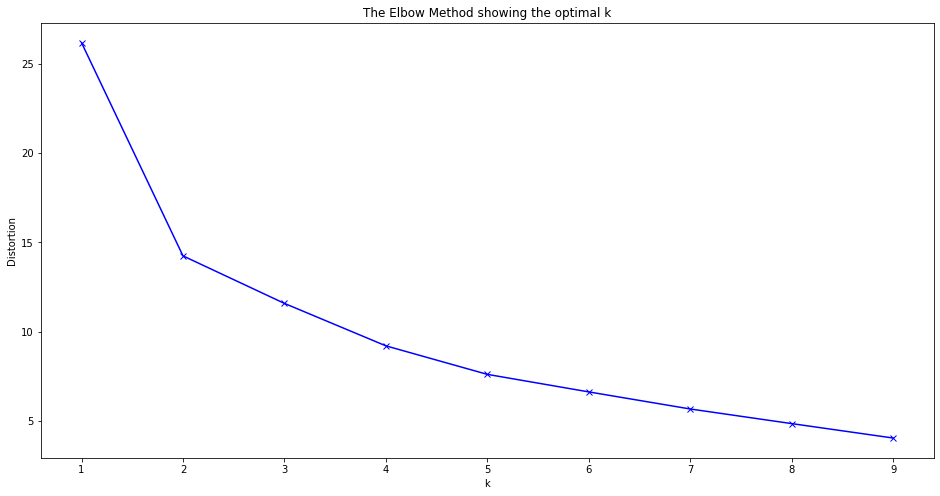

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
kmeanModel, clusters = k_means(feature_matrix=train_feature_matrix,
                           num_clusters=2)

In [76]:
km_obj.predict(test_feature_matrix[0])[0]

1

In [87]:
key_df = pd.DataFrame(row_id_keys.items())


In [88]:
test_key_df=key_df[40:]

In [94]:
test_key_df

,key,filename
40,40,jiTmYb7pPM.7937506604855339.txt
41,41,juE9npQetZ.5163804793372522.txt
42,42,kr2ybHdzaR.9232864911517599.txt
43,43,lDgbs8m1tf.08676825930990162.txt
44,44,lR1GLF0dl3.9833018883394823.txt
45,45,lZdgCU6d1U.12307985178981151.txt
46,46,lsKjqDEeir.4889217778570776.txt
47,47,m0xVYqvN8d.7758863033939478.txt
48,48,npow2gShDJ.7019849575646654.txt
49,49,p8IbJYSXxE.22562450196421968.txt


In [101]:
test_key_df.columns = ['key', 'filename']
test_key_df

,key,filename
40,40,jiTmYb7pPM.7937506604855339.txt
41,41,juE9npQetZ.5163804793372522.txt
42,42,kr2ybHdzaR.9232864911517599.txt
43,43,lDgbs8m1tf.08676825930990162.txt
44,44,lR1GLF0dl3.9833018883394823.txt
45,45,lZdgCU6d1U.12307985178981151.txt
46,46,lsKjqDEeir.4889217778570776.txt
47,47,m0xVYqvN8d.7758863033939478.txt
48,48,npow2gShDJ.7019849575646654.txt
49,49,p8IbJYSXxE.22562450196421968.txt


In [93]:
test_feature_matrix

<21x4188 sparse matrix of type '<class 'numpy.float64'>'
	with 5206 stored elements in Compressed Sparse Row format>

In [121]:
# Apen
for index, row in test_key_df.iterrows():
    key = int(row['key']) - 39
    
    #print(index , key)
    print(row['filename'])
#     test_key_df.loc[test_key_df.index[key], 'normalized_text'] = normalized_corpus[key + 39]
#     test_key_df.loc[test_key_df.index[key], 'predicted_group'] = km_obj.predict(tfidf_feature_matrix[key])[0]
    

jiTmYb7pPM.7937506604855339.txt
juE9npQetZ.5163804793372522.txt
kr2ybHdzaR.9232864911517599.txt
lDgbs8m1tf.08676825930990162.txt
lR1GLF0dl3.9833018883394823.txt
lZdgCU6d1U.12307985178981151.txt
lsKjqDEeir.4889217778570776.txt
m0xVYqvN8d.7758863033939478.txt
npow2gShDJ.7019849575646654.txt
p8IbJYSXxE.22562450196421968.txt
rxt3ocjppG.7973298407205462.txt
sGN3CBtN8o.35422772005643977.txt
sHMzQdloFS.2681163681335329.txt
tiMS4ch5zy.0033628833141092773.txt
vNPTbjqdSJ.7197300852931762.txt
vPSU9hwW5E.2173308100445802.txt
wZyhwhK1Oa.6182611089275415.txt
ySljWqQVmz.9326708723080476.txt
ygDG6ZzZ8T.25798542132023394.txt
z6qfxfW6F4.4237818575016189.txt
zu5R84I8ST.7841470681049597.txt


In [119]:
test_key_df

,key,filename,normalized_text,predicted_group
40,40,jiTmYb7pPM.7937506604855339.txt,NaN,NaN
41,41,juE9npQetZ.5163804793372522.txt,JavaScript is not available We ve detected tha...,0.0
42,42,kr2ybHdzaR.9232864911517599.txt,JavaScript is not available We ve detected tha...,0.0
43,43,lDgbs8m1tf.08676825930990162.txt,JavaScript is not available We ve detected tha...,0.0
44,44,lR1GLF0dl3.9833018883394823.txt,JavaScript is not available We ve detected tha...,1.0
45,45,lZdgCU6d1U.12307985178981151.txt,News News Local News Crime Public Safety Your ...,1.0
46,46,lsKjqDEeir.4889217778570776.txt,JavaScript is not available We ve detected tha...,0.0
47,47,m0xVYqvN8d.7758863033939478.txt,Skip to main content NFL News NFL Draft NFL Ti...,1.0
48,48,npow2gShDJ.7019849575646654.txt,JavaScript is not available We ve detected tha...,0.0
49,49,p8IbJYSXxE.22562450196421968.txt,JavaScript is not available We ve detected tha...,0.0


In [72]:
len(key_df[1:2]['normalized_text']

1

In [80]:
key_df.to_csv('test_dataset.csv')

In [2]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from collections import Counter

In [57]:
corpuspath = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\unclean_text_data_test\\'
corpus = PlaintextCorpusReader(corpuspath, '.*' , )

In [58]:
train_list = list(set(corpus.fileids())) # get unique file list (This dodent apply in real data files)

In [59]:
len(train_list)

61

In [60]:
import random
test_file_name_list = list(set(random.choices(files_list, k=20))

In [62]:
for filename in test_list:
    print(filename)
    train_list.remove(filename)

list

In [63]:
traintrain_list

2/lR1GLF0dl3.9833018883394823.txt
1/Jr1jDrrbqy.19224090056998133.txt
2/h8deBWDHFu.15330512422735665.txt
2/MxfyEFwodh.6291880775265848.txt
3/kr2ybHdzaR.9232864911517599.txt
3/Zou9I67X0r.22250236429049453.txt
3/lDgbs8m1tf.08676825930990162.txt
1/AshZjMudhh.05641859642807312.txt
3/99xzhtXoQO.8203288815364953.txt
3/juE9npQetZ.5163804793372522.txt
3/3B9wLEPpb4.11331682998371562.txt
3/DhR4Azo32a.4717029879255846.txt
3/3KF0FrO05V.7702580431456981.txt
3/Biq3eTMrTJ.9033166229586829.txt
3/RkhD6dTdiE.6111538098809065.txt
2/rxt3ocjppG.7973298407205462.txt
1/R0IAlteJhG.7059206210470494.txt
1/g0uT3UYPDH.787621649546468.txt


In [64]:
len(train_list)

43

In [65]:
len(test_file_name_list)

18

In [67]:
import pandas as pd
testFileNameDF = pd.DataFrame(list(dict.fromkeys(test_list)))

In [71]:
#testFileNameDF.to_csv('D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\\datasets\\test_file_names.csv', index=None)

In [72]:
# test_file_names = pd.read_csv('D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\\datasets\\test_file_names.csv')

In [79]:
# Mannualy Copy files from clean_text_data dir to final_train_data dir
# Removing randomly generated files from final_train_data to final_test_data dir
# file_source = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\datasets\\final_train_data\\'
file_source = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\unclean_text_data_test\\'
file_destination = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\datasets\\final_test_data\\'

In [76]:
test_file_name_list = test_file_names['0'].to_list()

In [80]:
import shutil
import os
for file in test_file_name_list:
    shutil.move(file_source + file, file_destination)

In [ ]:
kmeanModel, clusters = k_means(feature_matrix=train_feature_matrix, num_clusters=3)

In [82]:
from numpy import save